In [68]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

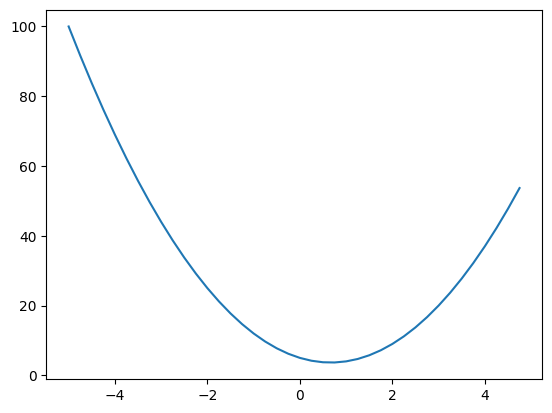

In [69]:
def f(x):
    return 3*x**2 - 4*x + 5

xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [70]:
# Numerical Derivation of f(x)
h = 0.00001
x = 2/3
slope = (f(x + h) - f(x)) / h
slope

3.0000002482211127e-05

In [71]:
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10

def d(a, b, c):
    return a * b + c

d1 = d(a, b, c)
a += h  # nudge a
d2 = d(a, b, c)

print(f"d1 : {d1}\nd2 : {d2}")
print(f"slope = {(d2 - d1) / h}")  # Same ans as geometric formula!

d1 : 4.0
d2 : 3.9999699999999994
slope = -3.000000000064062


In [72]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:
        return f"Value(data = {self.data})"
    
    def __add__(self, other) -> object:
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other) -> object:
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [73]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")

e = a * b ; e.label = "e"

d = e + c; d.label = "d"

f = Value(-2.0, label="f")

L = d * f; L.label = "L"

L

Value(data = -8.0)

In [74]:
from graphviz import Digraph

def trace(root):
    """
        Builds a set of all nodes and edges in a graph
    """    
    
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    nodes, edges = trace(root)
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR : Left to Right
    
    for n in nodes:
        # For any value in the graph, create a rectangular ('record') node for it.
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # If this value is a result of some operation, create an op node for it.
            dot.node(name=str(id(n)) + n._op, label = n._op)
            # andd connect this node to it.
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        # Connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

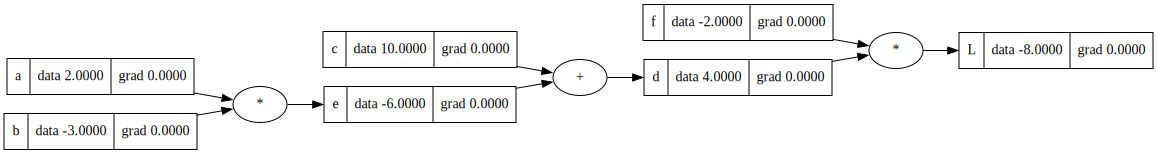

In [75]:
draw_dot(L)

## Summary:
    We're able to build out mathematical expressions, (with + and *), they are scalar valued.
    We can to do a forward pass to to build the exp.